In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
newblade1 = pd.read_csv(r"C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\18. Summative Capstone Project\Blades Dataset\CSV\NewBlade001.csv",index_col =0)
newblade2 = pd.read_csv(r"C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\18. Summative Capstone Project\Blades Dataset\CSV\NewBlade002.csv",index_col =0)
newblade3 = pd.read_csv(r"C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\18. Summative Capstone Project\Blades Dataset\CSV\NewBlade003.csv",index_col =0)
wornblade1 = pd.read_csv(r"C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\18. Summative Capstone Project\Blades Dataset\CSV\WornBlade001.csv",index_col =0)
wornblade2 = pd.read_csv(r"C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\18. Summative Capstone Project\Blades Dataset\CSV\WornBlade002.csv",index_col =0)
wornblade3 = pd.read_csv(r"C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\18. Summative Capstone Project\Blades Dataset\CSV\WornBlade003.csv",index_col =0)

In [3]:
newblade1["Condition"] = "1"
newblade2["Condition"] = "1"
newblade3["Condition"] = "1"
wornblade1["Condition"] = "0"
wornblade2["Condition"] = "0"
wornblade3["Condition"] = "0"

In [4]:
df = pd.concat([newblade1,
                  newblade2,
                  newblade3,
                  wornblade1,
                  wornblade2,
                  wornblade3])

In [5]:
df.head()

,pCut Motor: Torque,pCut CTRL Position controller: Lag error,pCut CTRL Position controller: Actual position,pCut CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Actual position,pSvolFilm CTRL Position controller: Actual speed,pSvolFilm CTRL Position controller: Lag error,Condition
Timestamp,,,,,,,,
-0.188,-0.112131,-0.002490,-884606,0.000000,11128,2.504289,0.261085,1
-0.184,-0.088931,-0.003863,-884606,17.166138,11128,-2.504289,0.260083,1
-0.180,-0.115141,0.001630,-884606,-6.866455,11128,7.513016,0.259081,1
-0.176,-0.111815,0.003003,-884606,-13.732910,11128,-2.504289,0.260083,1
-0.172,-0.130970,0.004376,-884606,-6.866455,11128,0.000000,0.261085,1


In [6]:
df.isnull().values.any()

False

In [7]:
X = df.drop(['Condition'], axis=1) # input
y = df['Condition'] # output (dependent variable)

In [8]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=42)

### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
clf = DecisionTreeClassifier()

In [10]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1,10),
              'min_samples_split': range(1, 10),
              'min_samples_leaf': range(1, 5)}

gs_clf = GridSearchCV(clf,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf.fit(X_train, y_train)

C:\Users\kerby\anaconda3\envs\Deep Learning\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.99572728 0.99572728 0.99572728 0.99562555 0.99562555
 0.99572728 0.99572728 0.99562555        nan 0.99562555 0.99572728
 0.99562555 0.99572728 0.99572728 0.99562555 0.99562555 0.99562555
        nan 0.99572728 0.99562555 0.99572728 0.99572728 0.99562555
 0.99562555 0.99572728 0.99562555        nan 0.99572728 0.99562555
 0.99562555 0.99562555 0.99562555 0.99572728 0.99562555 0.99572728
        nan 0.99572728 0.99572728 0.99572728 0.99562555 0.99572728
 0.99572728 0.99572728 0.99572728        nan 0.99562555 0.99562555
 0.99572728 0.99572728 0.99572728 0.99572728 0.99562555 0.99562555
        nan 0.99562555 0.99562555 0.99572728 0.99572728 0.99572728
 0.99572728 0.99562555 0.99572728        nan 0.99562555 0.99562555
 0.99562555 0.99572728 0.99562555 0.99572728 0.99572728 0.99562555
        nan 0.99949135 0.99949135 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='f1_macro')

In [11]:
# These are the best parameters for the decision tree classifier
gs_clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=9)

In [12]:
# Training the final model using the best parameters from above fine-tuning
classifier = gs_clf.best_estimator_
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=9)

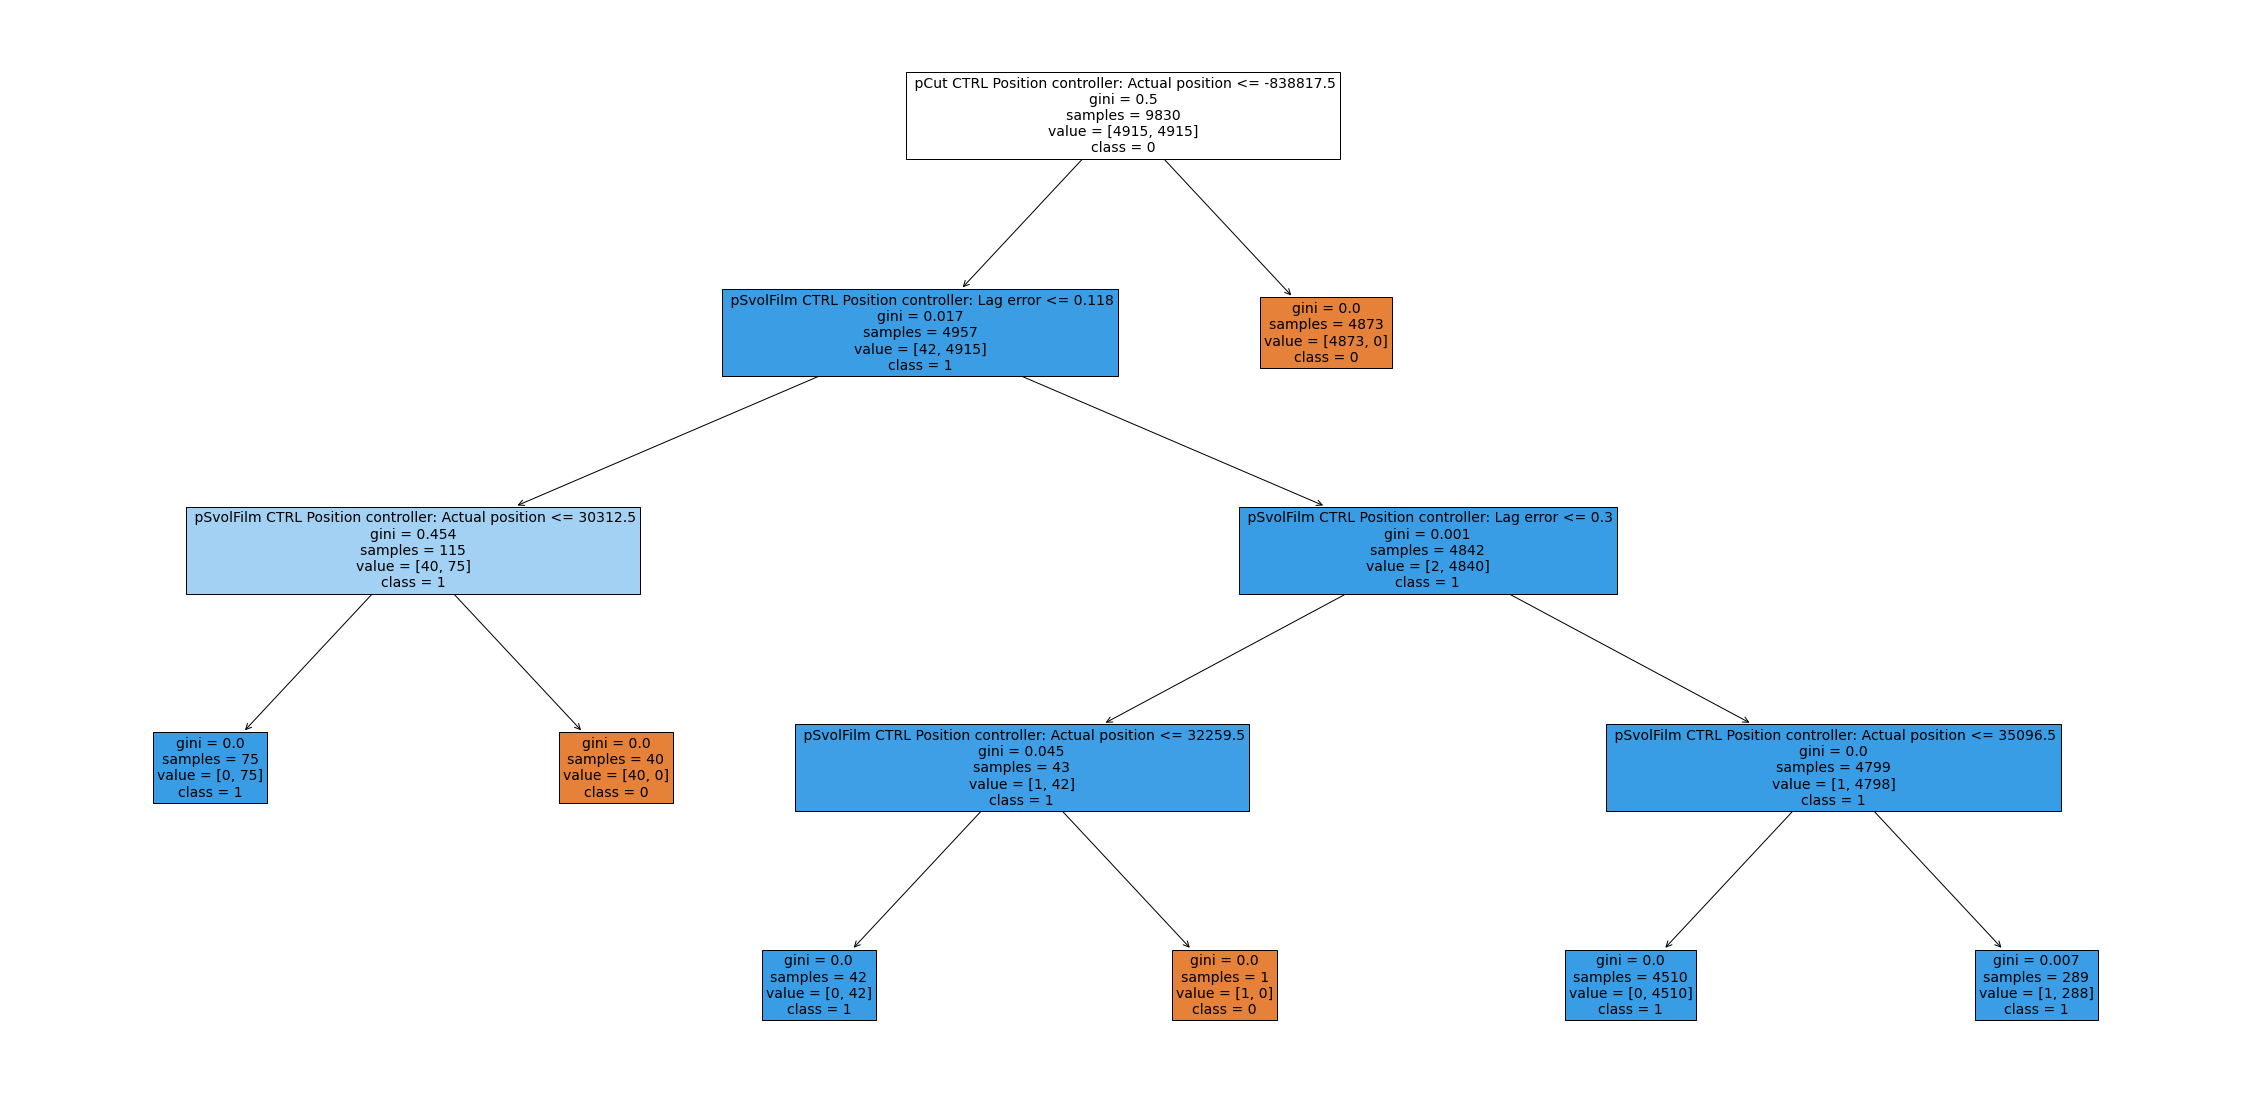

In [13]:
# Visualize the tree
from sklearn import tree

plt.figure(figsize=(40,20))
dtree_plot = tree.plot_tree(classifier,
                           feature_names = df.columns,
                           class_names = ['0','1'],
                           filled = True,
                           fontsize = 14)
plt.show()

In [14]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [21]:
compare_df

,Desired Output (Actuals),Predicted Output
Timestamp,,
4.672,1,1
4.996,1,1
3.720,0,0
3.800,1,1
4.428,1,1
...,...,...
3.712,0,0
5.756,1,1
5.988,0,0


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred, target_names=['0','1']))
print()

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1229
           1       1.00      1.00      1.00      1229

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458




Text(33.0, 0.5, 'Predictions')

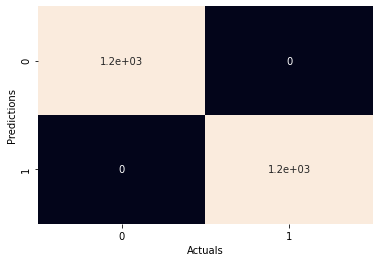

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(conf_mat.T, annot=True, cbar=False)
plt.xlabel("Actuals")
plt.ylabel("Predictions")

### SVM

In [24]:
# Import the Support Vector Machines algorithm
from sklearn.svm import LinearSVC, SVC
clf = SVC()

In [25]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.linspace(0.01, 2, 20),
             'kernel': ['rbf', 'poly', 'linear'],
             'gamma':np.linspace(0.001,5,10),
             'degree':range(2,6)}


In [26]:
gs_clf = GridSearchCV(clf,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)

In [ ]:
gs_clf.fit(X_train, y_train)

In [ ]:
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf.best_params_, gs_clf.best_score_))

In [ ]:
# Training the final model using the best parameters from above fine-tuning
classifier = gs_clf.best_estimator_
classifier.fit(X_train, y_train)

In [ ]:
# Training the final model using the best parameters from above fine-tuning
classifier = LinearSVC(C=0.0018957, penalty='l2')
classifier.fit(X_train, y_train)